Linear Regression - Boston Data


1.Import libraries

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from scipy.stats import  shapiro
from scipy.stats import kstest
from scipy.stats import normaltest
import pickle

2.Problem Statement
>>To predict Boston Housing Prices

3.Data Gathering

In [2]:
df=pd.read_csv("Boston.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


4.Exploratory Data Analysis

In [3]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.var()

crim          73.986578
zn           543.936814
indus         47.064442
chas           0.064513
nox            0.013428
rm             0.493671
age          792.358399
dis            4.434015
rad           75.816366
tax        28404.759488
ptratio        4.686989
black       8334.752263
lstat         50.994760
medv          84.586724
dtype: float64

5.Assumptions(Linearity)

In [6]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

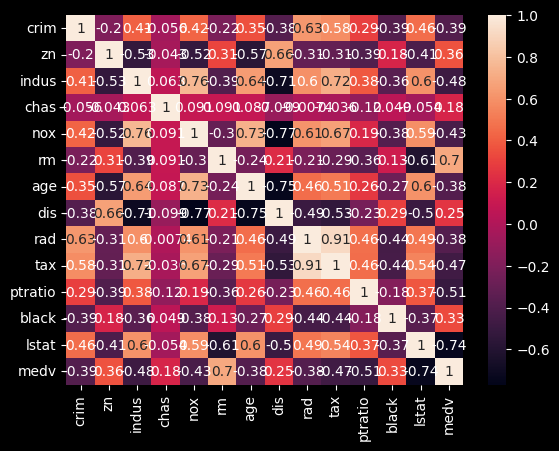

In [7]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

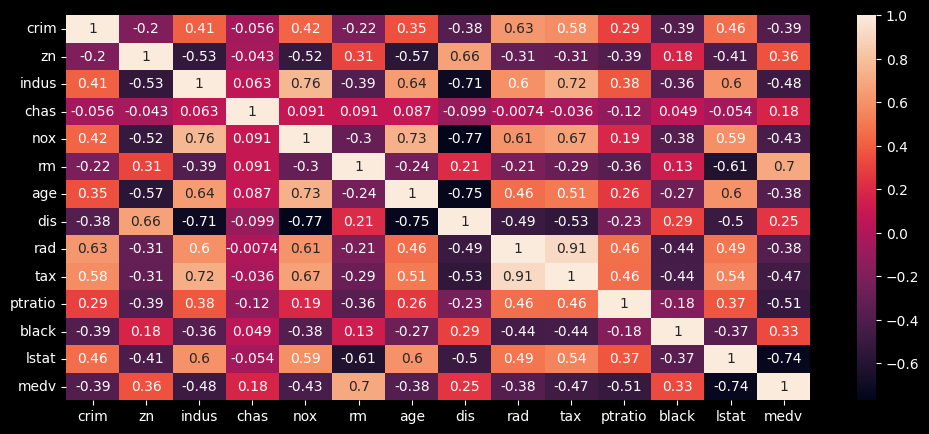

In [8]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

In [9]:
Corelation=df.corr().tail(1)
Corelation

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
medv,-0.388305,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


<Axes: >

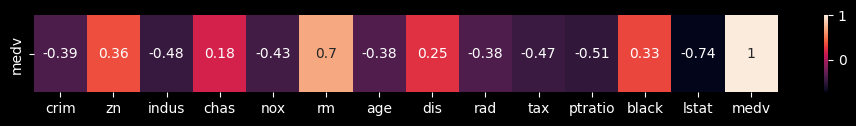

In [10]:
plt.figure(figsize=(12,1))
sns.heatmap(Corelation,annot=True)

6.Assumption(No multi co linearity)

In [11]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [12]:
df.to_numpy()

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [13]:
df.shape[1]

14

In [14]:
vif_list=[]
for i in range(df.shape[1]-1):
    vif=variance_inflation_factor(df.to_numpy(),i)
    print(f"Vif of {df.columns[i]} is>>",vif)
    vif_list.append(vif)

Vif of crim is>> 2.13140423989164
Vif of zn is>> 2.9100040831335887
Vif of indus is>> 14.485874343285056
Vif of chas is>> 1.176265953292883
Vif of nox is>> 74.00426852716569
Vif of rm is>> 136.1017425464841
Vif of age is>> 21.39886253165994
Vif of dis is>> 15.430455486916713
Vif of rad is>> 15.369979849775836
Vif of tax is>> 61.93971317434026
Vif of ptratio is>> 87.22723281176584
Vif of black is>> 21.35101506934191
Vif of lstat is>> 12.615187641345385


In [15]:
vif_list

[2.13140423989164,
 2.9100040831335887,
 14.485874343285056,
 1.176265953292883,
 74.00426852716569,
 136.1017425464841,
 21.39886253165994,
 15.430455486916713,
 15.369979849775836,
 61.93971317434026,
 87.22723281176584,
 21.35101506934191,
 12.615187641345385]

In [16]:
x=df.drop("medv",axis=1)
x.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [17]:
s1=pd.Series(vif_list,index=x.columns)
s1

crim         2.131404
zn           2.910004
indus       14.485874
chas         1.176266
nox         74.004269
rm         136.101743
age         21.398863
dis         15.430455
rad         15.369980
tax         61.939713
ptratio     87.227233
black       21.351015
lstat       12.615188
dtype: float64

<Axes: >

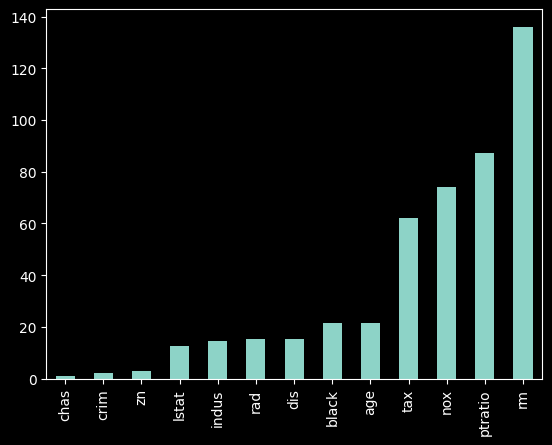

In [18]:
s1.sort_values().plot(kind="bar")

<Axes: >

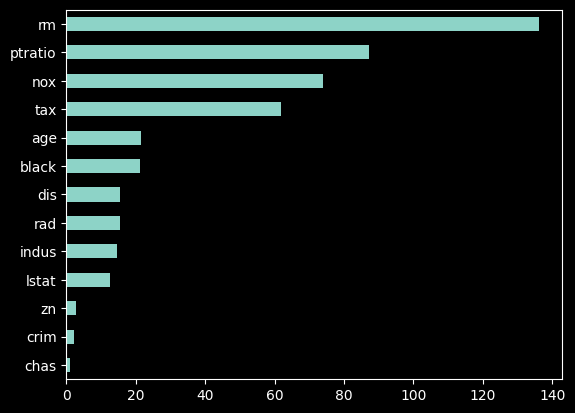

In [19]:
s1.sort_values().plot(kind="barh")

7.Model Training

In [20]:
x=df.drop("medv",axis=1)
y=df["medv"]

In [21]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [22]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [24]:
x_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
192,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87
138,0.24980,0.0,21.89,0,0.624,5.857,98.2,1.6686,4,437,21.2,392.04,21.32
251,0.21409,22.0,5.86,0,0.431,6.438,8.9,7.3967,7,330,19.1,377.07,3.59
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26
256,0.01538,90.0,3.75,0,0.394,7.454,34.2,6.3361,3,244,15.9,386.34,3.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666,20.2,396.90,30.81
197,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2,329,12.6,354.31,8.61
439,9.39063,0.0,18.10,0,0.740,5.627,93.9,1.8172,24,666,20.2,396.90,22.88
174,0.08447,0.0,4.05,0,0.510,5.859,68.7,2.7019,5,296,16.6,393.23,9.64


In [25]:
x_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
289,0.04297,52.5,5.32,0,0.405,6.565,22.9,7.3172,6,293,16.6,371.72,9.51
68,0.13554,12.5,6.07,0,0.409,5.594,36.8,6.4980,4,345,18.9,396.90,13.09
211,0.37578,0.0,10.59,1,0.489,5.404,88.6,3.6650,4,277,18.6,395.24,23.98
226,0.38214,0.0,6.20,0,0.504,8.040,86.5,3.2157,8,307,17.4,387.38,3.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,4.89822,0.0,18.10,0,0.631,4.970,100.0,1.3325,24,666,20.2,375.52,3.26
144,2.77974,0.0,19.58,0,0.871,4.903,97.8,1.3459,5,403,14.7,396.90,29.29
336,0.03427,0.0,5.19,0,0.515,5.869,46.3,5.2311,5,224,20.2,396.90,9.80
437,15.17720,0.0,18.10,0,0.740,6.152,100.0,1.9142,24,666,20.2,9.32,26.45


In [26]:
y_train

192    36.4
138    13.3
251    24.8
13     20.4
256    44.0
       ... 
385     7.2
197    30.3
439    12.8
174    22.6
122    20.5
Name: medv, Length: 404, dtype: float64

In [27]:
y_test

8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
       ... 
368    50.0
144    11.8
336    19.5
437     8.7
216    23.3
Name: medv, Length: 102, dtype: float64

8.Instantiating Linear Model

In [28]:
linear_reg=LinearRegression()
linear_reg

LinearRegression()

In [29]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [30]:
linear_reg.coef_

array([-1.15966452e-01,  4.71249231e-02,  8.25980146e-03,  3.23404531e+00,
       -1.66865890e+01,  3.88410651e+00, -1.08974442e-02, -1.54129540e+00,
        2.93208309e-01, -1.34059383e-02, -9.06296429e-01,  8.80823439e-03,
       -4.57723846e-01])

In [31]:
linear_reg.intercept_

35.55487453600667

9.Model Evaluation on Testing Data

In [32]:
y_predict=linear_reg.predict(x_test)
y_predict[:10]

array([12.07495986, 26.9894969 , 17.58803353, 18.15584511, 36.92091659,
       25.43267386, 31.09256932, 19.72549907, 19.66103377, 22.96358632])

In [33]:
y_test[:10]

8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
70     24.2
55     35.4
470    19.9
409    27.5
154    17.0
Name: medv, dtype: float64

In [34]:
mse=mean_squared_error(y_test,y_predict)
print("Mean Squared Error: ",mse)
print()
rmse=np.sqrt(mse)
print("Root mean squared error: ",rmse)
print()
mae=mean_absolute_error(y_test,y_predict)
print("Mean Absolute Error: ",mae)
print()
r_sqaured=r2_score(y_test,y_predict)
print("R squared value: ",r_sqaured)

Mean Squared Error:  25.419587126821902

Root mean squared error:  5.041784121402056

Mean Absolute Error:  3.3677909837965827

R squared value:  0.7263451459702503


10.Model Evaluation on Training Data

In [35]:
y_predict_training=linear_reg.predict(x_train)
y_predict_training[:10]

array([32.48868327, 14.19702067, 24.92799799, 19.48930731, 37.24234267,
       31.72198516, 34.63613293, 28.84117373, 29.84021846, 20.52932373])

In [36]:
y_train[:10]

192    36.4
138    13.3
251    24.8
13     20.4
256    44.0
299    29.0
180    39.8
92     22.9
219    23.0
152    15.3
Name: medv, dtype: float64

In [37]:
mse=mean_squared_error(y_train,y_predict_training)
print("Mean Squared error:",mse)
print()
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)
print()
mae=mean_absolute_error(y_train,y_predict_training)
print("Mean Absolute Error:",mae)
print()
r_sqaured=r2_score(y_train,y_predict_training)
print("R squared value:",r_sqaured)

Mean Squared error: 21.197139922226427

Root Mean Squared Error: 4.604035178213393

Mean Absolute Error: 3.2269621335646828

R squared value: 0.7415244219726307


11.Testing our Model

In [38]:
row_23=x_train.iloc[23]
row_23

crim         6.80117
zn           0.00000
indus       18.10000
chas         0.00000
nox          0.71300
rm           6.08100
age         84.40000
dis          2.71750
rad         24.00000
tax        666.00000
ptratio     20.20000
black      396.90000
lstat       14.70000
Name: 459, dtype: float64

In [39]:
y_predict_new=linear_reg.predict([row_23])
y_predict_new

array([18.09807292])

In [40]:
y_train.iloc[23]

20.0

12.Assumption(Normality of Residuals)

In [41]:
residual=y_train-y_predict_training
residual

192    3.911317
138   -0.897021
251   -0.127998
13     0.910693
256    6.757657
         ...   
385   -1.298482
197   -2.167172
439   -0.323782
174   -3.816837
122   -0.364459
Name: medv, Length: 404, dtype: float64

kdeplot

<Axes: xlabel='medv', ylabel='Density'>

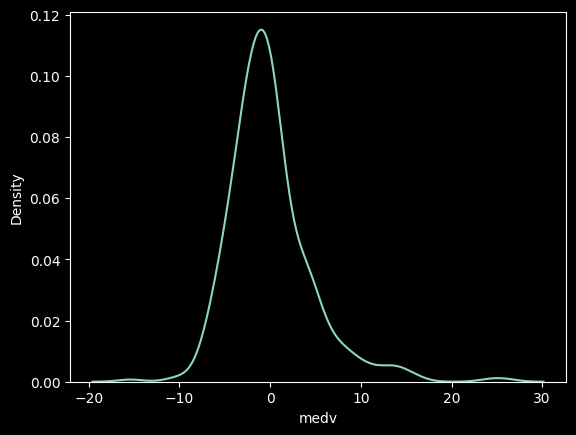

In [42]:
sns.kdeplot(residual)

<Axes: xlabel='medv', ylabel='Density'>

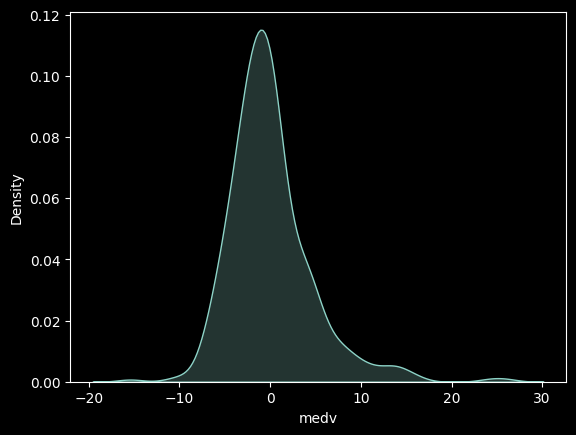

In [43]:
sns.kdeplot(residual,fill=True)

histplot

<Axes: xlabel='medv', ylabel='Count'>

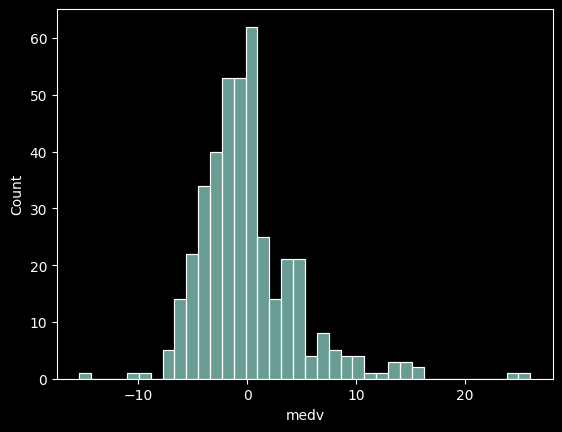

In [44]:
sns.histplot(residual)

<Axes: xlabel='medv', ylabel='Count'>

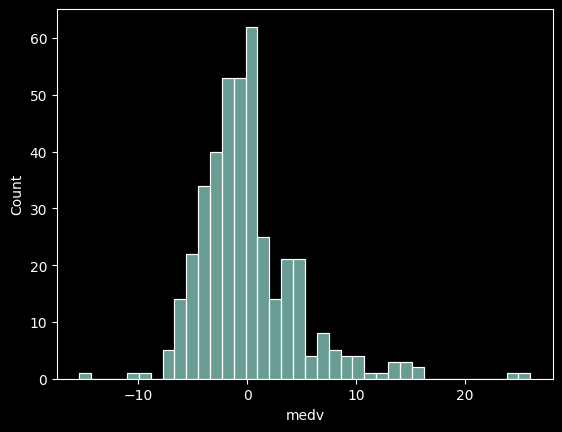

In [45]:
sns.histplot(residual,fill=True)

Both kdeplot and histplot

<Axes: xlabel='medv', ylabel='Count'>

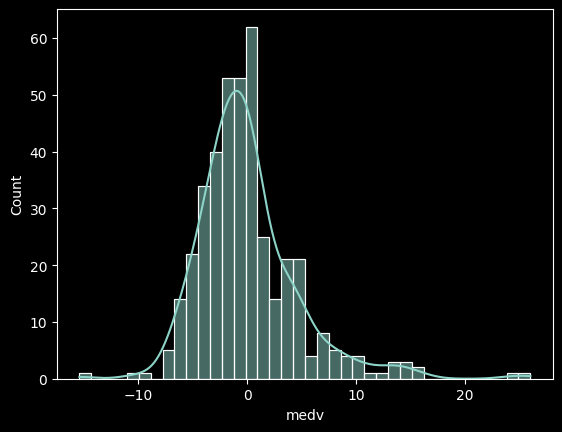

In [46]:
sns.histplot(residual,kde=True)

QQ plot

In [47]:
import statsmodels.api as sm

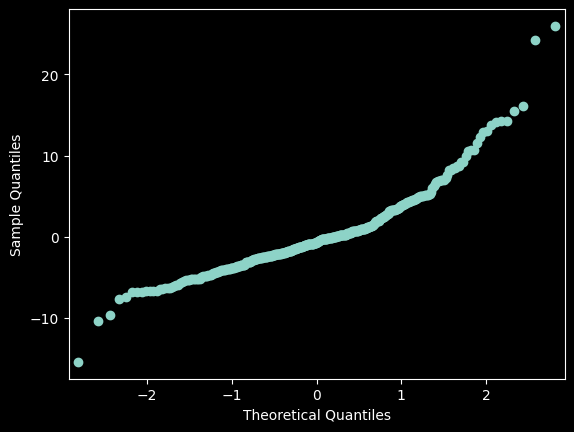

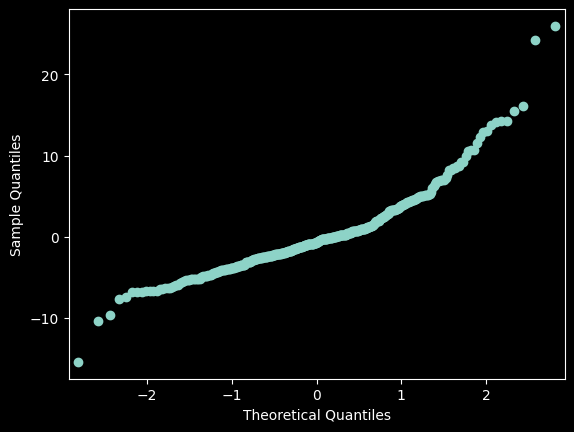

In [48]:
sm.qqplot(residual)

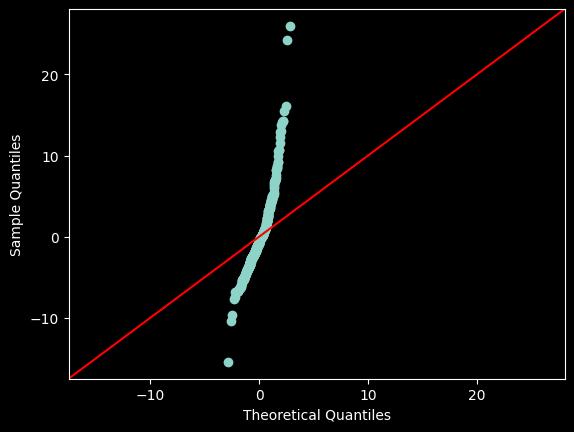

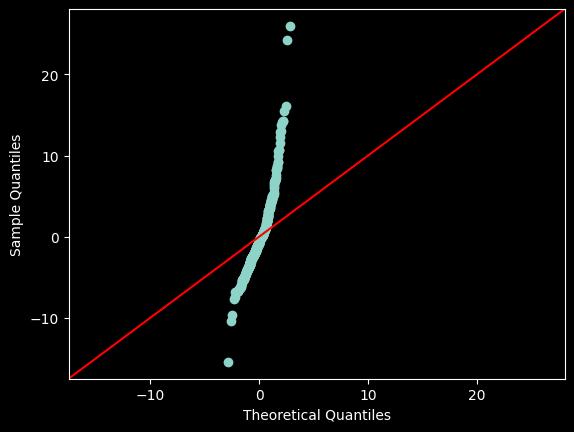

In [49]:
sm.qqplot(residual,line="45")

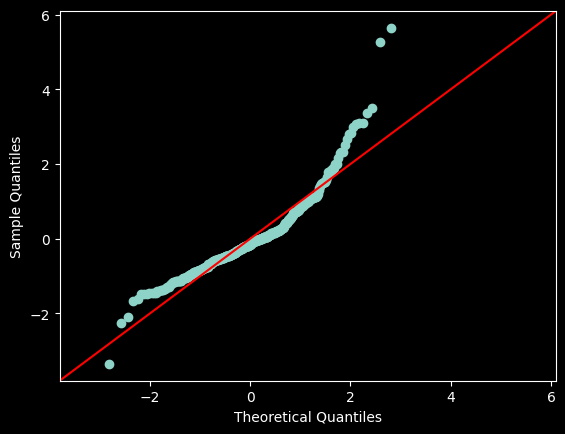

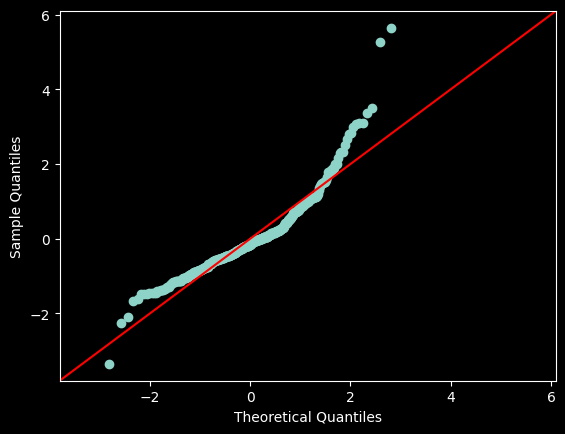

In [50]:
sm.qqplot(residual,line="45",fit=True)

Testing perfect values for normal distribution

In [51]:
arr1=np.random.randn(10)
arr1

array([ 1.83547753,  0.13260469,  0.95818683, -0.81951274, -0.94700564,
        0.86586575, -0.0875303 ,  0.74902853,  2.16591154, -0.39718296])

<Axes: ylabel='Density'>

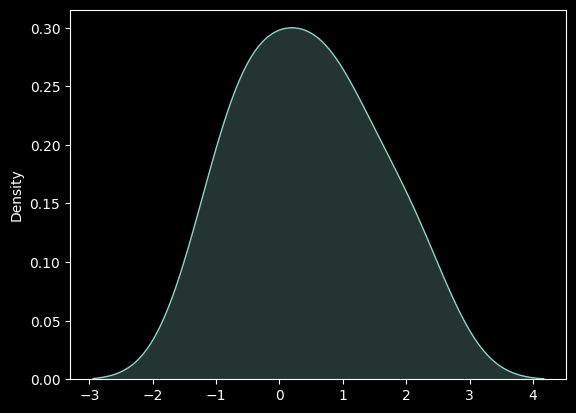

In [52]:
sns.kdeplot(arr1,fill=True)

<Axes: ylabel='Count'>

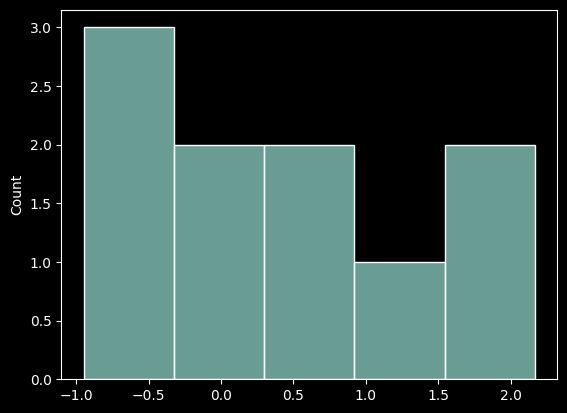

In [53]:
sns.histplot(arr1)

<Axes: ylabel='Count'>

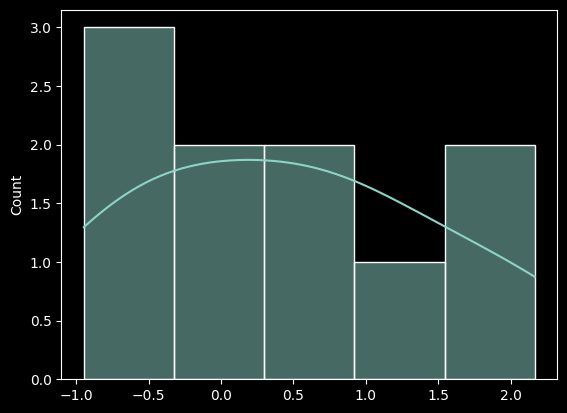

In [54]:
sns.histplot(arr1,kde=True,fill=True)

In [55]:
import statsmodels.api as sm

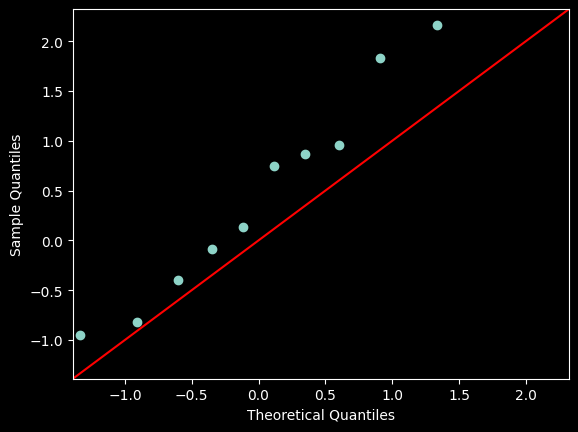

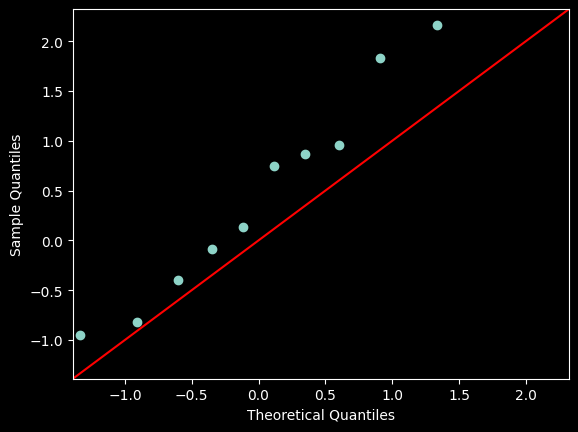

In [56]:
sm.qqplot(arr1,line="45")

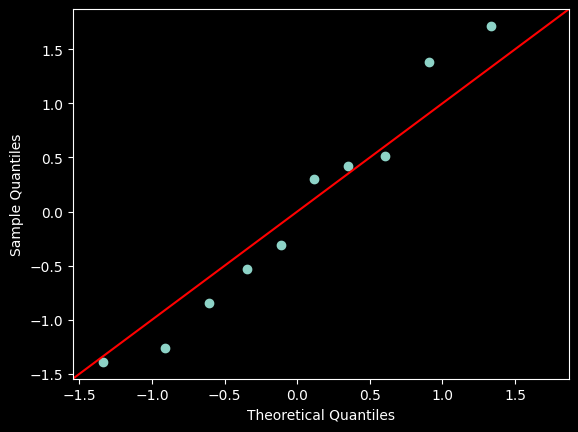

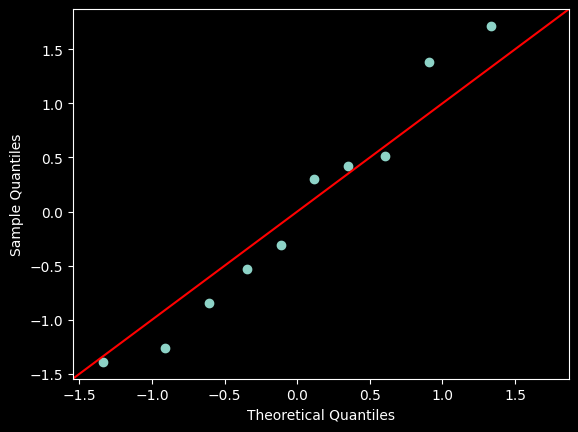

In [57]:
sm.qqplot(arr1,line="45",fit=True)

Skewness of Residual

In [58]:
residual.skew()

1.4926168501684343

In [59]:
pd.Series(arr1).skew()

0.2948640255724224

In [60]:
df["age"]

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: age, Length: 506, dtype: float64

In [61]:
df["age"].skew()

-0.5989626398812962

In [62]:
df["lstat"].skew()

0.9064600935915367

Checking Normal Distribution of Independent Variables

In [63]:
df["age"].skew()

-0.5989626398812962

<Axes: xlabel='age', ylabel='Density'>

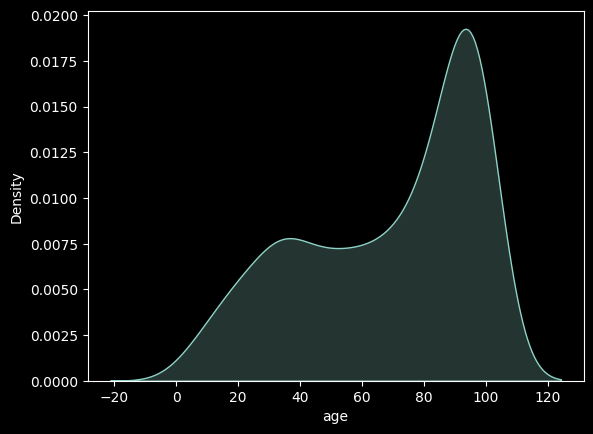

In [64]:
sns.kdeplot(df["age"],fill=True)

In [65]:
df["lstat"].skew()

0.9064600935915367

<Axes: xlabel='lstat', ylabel='Density'>

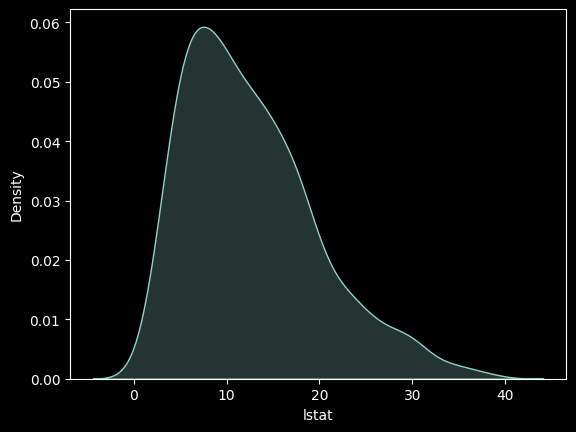

In [66]:
sns.kdeplot(df["lstat"],fill=True)

In [67]:
mean=df["age"].mean()
print("Mean of Age feature:",mean)
median=df["age"].median()
print("Median of Age feature:",median)
mode=df["age"].mode()[0]
print("Mode of Age feature:",mode)

Mean of Age feature: 68.57490118577076
Median of Age feature: 77.5
Mode of Age feature: 100.0


In [68]:
df["age"].skew()

-0.5989626398812962

In [69]:
mean=df["lstat"].mean()
print("Mean of lstat feature:",mean)
median=df["lstat"].median()
print("Median of lstat feature:",median)
mode=df["lstat"].mode()[0]
print("Mode of lstat feature:",mode)


Mean of lstat feature: 12.653063241106722
Median of lstat feature: 11.36
Mode of lstat feature: 6.36


In [70]:
df["lstat"].skew()

0.9064600935915367

Hypothesis Testing

Shapiro

In [71]:
from scipy.stats import shapiro

In [72]:
stats,p_value=shapiro(residual)
p_value

1.6042463090235179e-15

In [73]:
if p_value>0.05:
    print("Data is normally distributed")
    print("Null Hypothesis is TRUE")
else:
    print("Data is not normally distributed")
    print("Null Hypothesis is FALSE")
    print("Alternate Hypothesis is TRUE")

Data is not normally distributed
Null Hypothesis is FALSE
Alternate Hypothesis is TRUE


In [74]:
stats,p_value=shapiro(df["age"])
print("P value is: ", p_value)
if p_value>0.05:
    print("Data is normally distributed")
    print("Null hypothesis is TRUE")
else:
    print("Data is not normally distributed")
    print("Null hypothesis is FALSE")
    print("Alernate hypothesis is TRUE")

P value is:  2.2311304847966706e-18
Data is not normally distributed
Null hypothesis is FALSE
Alernate hypothesis is TRUE


In [75]:
arr1

array([ 1.83547753,  0.13260469,  0.95818683, -0.81951274, -0.94700564,
        0.86586575, -0.0875303 ,  0.74902853,  2.16591154, -0.39718296])

In [76]:
stats,p_value=shapiro(arr1)
print("P value is ",p_value)
if p_value>0.05:
    print("Data is normally distributed")
    print("Null hypothesis is True")
else:
    print("Data is not normally distributed")
    print("Null hypothesis is False")
    print("Alternate hypothesis is True")

P value is  0.6755500435829163
Data is normally distributed
Null hypothesis is True


kstest

In [77]:
from scipy.stats import kstest

In [78]:
stats,p_value=kstest(residual,"norm")
print("P value is: ",p_value)
if p_value>0.05:
    print("Data is normally distributed")
    print("Null Hypothesis is True")
else:
    print("Data is not normally distributed")
    print("Null Hypothesis is False")
    print("Alternate hypothesis is True")

P value is:  2.0053251045111974e-42
Data is not normally distributed
Null Hypothesis is False
Alternate hypothesis is True


In [79]:
stats,p_value=kstest(df["lstat"],"norm")
print("P value is:",p_value)
if p_value>0.05:
    print("Data is normally distributed")
    print("Null Hypothesis is TRUE")
else:
    print("Data is not normally distributed")
    print("Null Hypothesis is FALSE")
    print("Alternate hypothesis is TRUE")

P value is: 0.0
Data is not normally distributed
Null Hypothesis is FALSE
Alternate hypothesis is TRUE


Normal Test

In [80]:
from scipy.stats import normaltest

In [81]:
stats,p_value=normaltest(residual)
print("P value is:",p_value)
if p_value>0.05:
    print("Data is Normally distributed")
    print("Null Hypothesis is True")
else:
    print("Data is not normally distributed")
    print("Null Hypothesis is False")
    print("Alternate hypothesis is True")

P value is: 3.6924320773708215e-31
Data is not normally distributed
Null Hypothesis is False
Alternate hypothesis is True


In [82]:
stats,p_value=normaltest(df["age"])
print("P value is ", p_value)
if p_value>0.05:
    print("Data is normally distributed")
    print("Null Hypothesis is True")
else:
    print("Data is not normally distributed")
    print("Null Hypothesis is False")
    print("Alternate Hypothesis is True")

P value is  1.6191768966045395e-25
Data is not normally distributed
Null Hypothesis is False
Alternate Hypothesis is True


13.Homo Skedasticity

<Axes: xlabel='medv', ylabel='medv'>

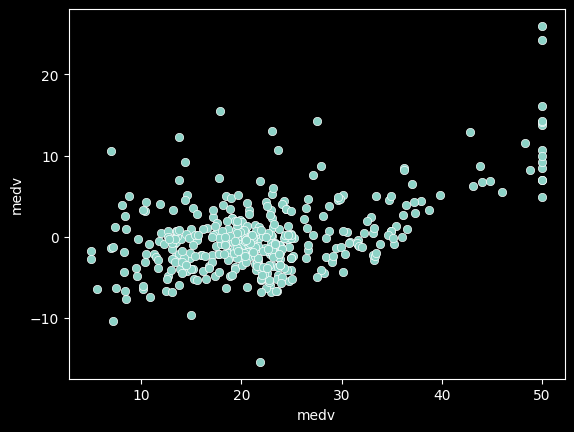

In [83]:
sns.scatterplot(x=y_train,y=residual)

Testing Model On User Input

In [84]:
row_25=x_test.iloc[25]
row_25

crim         0.21161
zn           0.00000
indus        8.56000
chas         0.00000
nox          0.52000
rm           6.13700
age         87.40000
dis          2.71470
rad          5.00000
tax        384.00000
ptratio     20.90000
black      394.47000
lstat       13.44000
Name: 103, dtype: float64

In [85]:
predicted_value=linear_reg.predict([row_25])
print("Predicted Value is: ", predicted_value)

Predicted Value is:  [20.32352451]


In [86]:
y_test.iloc[25]

19.3

In [87]:
import pickle
with open("Model_LR_Boston.pkl","wb") as f:
    pickle.dump(linear_reg,f)

Regularization

In [88]:
linear_reg.coef_

array([-1.15966452e-01,  4.71249231e-02,  8.25980146e-03,  3.23404531e+00,
       -1.66865890e+01,  3.88410651e+00, -1.08974442e-02, -1.54129540e+00,
        2.93208309e-01, -1.34059383e-02, -9.06296429e-01,  8.80823439e-03,
       -4.57723846e-01])

In [89]:
s1=pd.Series(linear_reg.coef_,index=x.columns)
s1

crim       -0.115966
zn          0.047125
indus       0.008260
chas        3.234045
nox       -16.686589
rm          3.884107
age        -0.010897
dis        -1.541295
rad         0.293208
tax        -0.013406
ptratio    -0.906296
black       0.008808
lstat      -0.457724
dtype: float64

<Axes: >

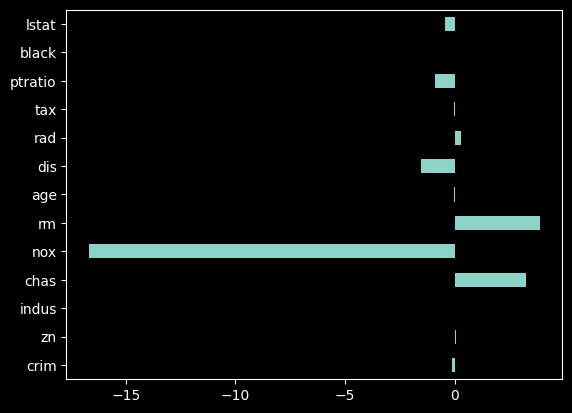

In [90]:
s1.plot(kind="barh")

Lasso regression model

In [91]:
lasso_model=Lasso()
lasso_model.fit(x_train, y_train)

Lasso()

In [92]:
lasso_model.score(x_train, y_train) #R2 score of Training data

0.6825329392289143

Training Model Evaluation

In [93]:
lasso_model=Lasso(alpha=2)
lasso_model.fit(x_train, y_train)
y_predict_train=lasso_model.predict(x_train)
y_predict_train

array([30.62103505, 14.41495163, 27.50456883, 24.47172037, 33.29238487,
       29.74461321, 29.03771666, 27.19451111, 27.04994641, 24.92308173,
        7.60318146, 29.37685651, 29.35955966, 24.25656688, 32.14075215,
       18.65917218,  4.76796667, 22.80041438, 22.31774129, 15.99071746,
       27.71183379, 26.21998949, 23.35743372, 19.3875769 , 31.82282805,
       10.47707712, 17.78317102, 18.49529563, 30.72562963, 19.47821683,
       33.76901182, 28.50610571, 27.44853884, 20.38890261, 10.4874375 ,
       26.64398805, 24.548936  , 20.15798091, 14.32497954, 12.9329136 ,
       24.346097  , 20.81009736,  1.96673257, 23.43218538, 16.35818641,
       17.06047391, 26.51552115, 24.0714193 , 30.21627892, 17.17414472,
       24.84876133, 23.8914258 , 18.08507727, 15.64387536, 31.12580526,
       16.49762434, 33.25147532, 16.88351146, 23.18096123, 33.39974352,
       29.42435939, 10.80243221, 14.0183827 , 21.64423557, 25.34904638,
       26.54634363, 20.61116216, 23.96089158, 26.53448153, 22.98

In [94]:
mse=mean_squared_error(y_train,y_predict_train)
print("Mean Squared error:",mse)
print()
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)
print()
mae=mean_absolute_error(y_train,y_predict_train)
print("Mean Absolute Error:",mae)
print()
r_sqaured=r2_score(y_train,y_predict_train)
print("R squared value:",r_sqaured)

Mean Squared error: 31.435417922564604

Root Mean Squared Error: 5.606729699438399

Mean Absolute Error: 3.9473161989953613

R squared value: 0.6166799932500808


Model Evaluation on testing data

In [95]:
y_predict_test=lasso_model.predict(x_test)
y_predict_test

array([12.52732023, 26.01967063, 20.64893843, 15.10665348, 32.0094445 ,
       24.46718289, 30.69120984, 18.1476044 , 14.74868932, 22.74379524,
       28.67110083, 27.64931883, 21.60280112, 30.15907294, 22.43988165,
       14.27228467, 24.81694993,  7.08128592, 14.43359489, 18.44635664,
       12.00043605, 21.96506867, 20.96589752, 22.2383275 , 22.25182642,
       20.9310317 , 16.20059387, 16.56681442, 19.36351208, 17.13499   ,
       12.15904375, 28.4912691 , 29.2954047 , 22.50474538, 18.07599945,
       14.98555711, 28.57109689, 28.73675057, 27.87217319, 25.48279377,
       31.69317313, 31.17976426, 19.28040357, 29.6764175 , 27.06843545,
       26.29735181, 33.97155046, 19.49551373, 19.88494125, 23.7351904 ,
       31.1415759 , 25.6219586 , 15.5919348 , 27.6476286 , 16.64270754,
       24.4198262 , 23.75498441, 31.6153024 , 20.34527478, 30.84703472,
       19.04969965, 19.85956706, 29.61614099, 17.29247181, 33.87733598,
       29.474582  , 28.39384859,  6.55066204, 18.88892736, 21.20

In [96]:
mse=mean_squared_error(y_test,y_predict_test)
print("Mean Squared Error: ",mse)
print()
rmse=np.sqrt(mse)
print("Root mean squared error: ",rmse)
print()
mae=mean_absolute_error(y_test,y_predict_test)
print("Mean Absolute Error: ",mae)
print()
r_sqaured=r2_score(y_test,y_predict_test)
print("R squared value: ",r_sqaured)

Mean Squared Error:  34.093930608011625

Root mean squared error:  5.839000822744558

Mean Absolute Error:  3.856211840834375

R squared value:  0.6329614026660897


In [97]:
s1=pd.Series(lasso_model.coef_,index=x.columns)
s1

crim      -0.018152
zn         0.030434
indus     -0.000000
chas       0.000000
nox       -0.000000
rm         0.000000
age        0.037173
dis       -0.127782
rad        0.140754
tax       -0.012080
ptratio   -0.542440
black      0.006034
lstat     -0.773115
dtype: float64

<Axes: >

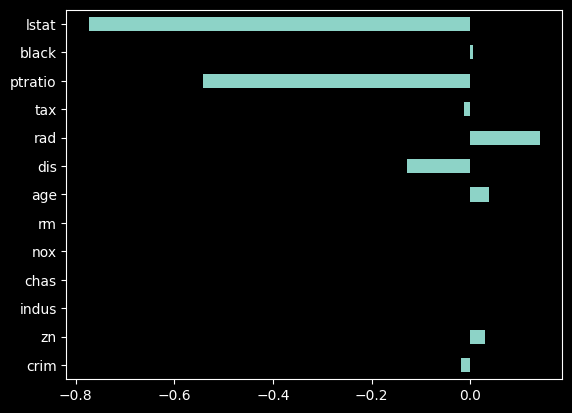

In [98]:
s1.plot(kind="barh")

Ridge Regression

In [99]:
Ridge_model=Ridge(alpha=2)
Ridge_model.fit(x_train, y_train)


Ridge(alpha=2)

Model Evaluation on Training data

In [100]:
y_predict_train=Ridge_model.predict(x_train)
y_predict_train

array([32.4173946 , 14.10279584, 25.30164719, 20.16669089, 36.92058115,
       31.64903772, 34.43814406, 28.16530126, 28.98160361, 22.09985985,
       12.77159732, 29.74006445, 35.37663776, 22.40255792, 40.68106451,
       18.16708873,  3.16807092, 17.95114528, 21.53483422, 16.19296689,
       28.29405035, 28.65136499, 19.29394868, 18.74681888, 35.8401957 ,
       12.68674911, 14.64861717, 17.70495435, 39.02561508, 16.03235097,
       43.67533527, 30.94790096, 30.55746163, 21.9099555 , 12.77405165,
       25.99215922, 22.93347566, 18.90545075, 17.12381574, 17.69960832,
       21.07988403, 24.7135569 ,  1.02007304, 22.40893549, 19.27042468,
       18.12262393, 37.68823418, 20.03788818, 31.64617785, 18.20394923,
       24.78632076, 15.40352946, 23.55731092, 14.18580248, 40.9323954 ,
       18.4255795 , 41.3152309 , 15.02269662, 20.58934337, 39.14930741,
       33.73011432, 15.48894266, 10.8913938 , 21.93279988, 25.18559438,
       25.68617502, 14.85801574, 25.25435006, 24.74560937, 22.37

In [101]:
mse=mean_squared_error(y_train,y_predict_train)
print("Mean Squared error:",mse)
print()
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)
print()
mae=mean_absolute_error(y_train,y_predict_train)
print("Mean Absolute Error:",mae)
print()
r_sqaured=r2_score(y_train,y_predict_train)
print("R squared value:",r_sqaured)

Mean Squared error: 21.531178990174052

Root Mean Squared Error: 4.640170146683638

Mean Absolute Error: 3.246292540991228

R squared value: 0.7374511865508578


Model Evalauation on testing data

In [102]:
y_predict_test=Ridge_model.predict(x_test)
y_predict_test

array([11.56266862, 26.73863222, 17.21594026, 16.92088972, 36.59114987,
       25.13739638, 31.57968242, 19.03783453, 18.69707124, 24.48493777,
       29.00365241, 28.26565984, 19.15649568, 31.40078272, 21.78364301,
       15.58881715, 21.14559807, 11.70680931, 10.42622806, 13.89039911,
        5.69586246, 19.22160436, 20.23705207, 22.2125284 , 16.59657479,
       20.11887844, 16.59693645, 14.25415615, 20.36450872, 17.10231493,
       14.551672  , 23.67767458, 34.84792342, 21.9734681 , 17.06001673,
       20.00869638, 30.6885635 , 35.891538  , 23.63186578, 24.36265294,
       36.86292711, 31.78959246, 19.54503411, 32.08966453, 32.4778725 ,
       25.07939755, 40.48787456, 17.58222988, 20.02939059, 23.65015111,
       33.36928544, 25.55076784, 18.1896974 , 27.60294588, 13.37257487,
       23.05426658, 24.40271388, 33.32603963, 17.35372404, 35.94532107,
       15.83159181, 19.64147525, 31.70725601, 14.99156868, 39.41522264,
       27.87247982, 31.18413702,  9.81945328, 18.6088914 , 21.57

In [103]:
mse=mean_squared_error(y_test,y_predict_test)
print("Mean Squared Error: ",mse)
print()
rmse=np.sqrt(mse)
print("Root mean squared error: ",rmse)
print()
mae=mean_absolute_error(y_test,y_predict_test)
print("Mean Absolute Error: ",mae)
print()
r_sqaured=r2_score(y_test,y_predict_test)
print("R squared value: ",r_sqaured)

Mean Squared Error:  25.931771302149947

Root mean squared error:  5.092324744372648

Mean Absolute Error:  3.3368571210030193

R squared value:  0.7208312214113479


<Axes: >

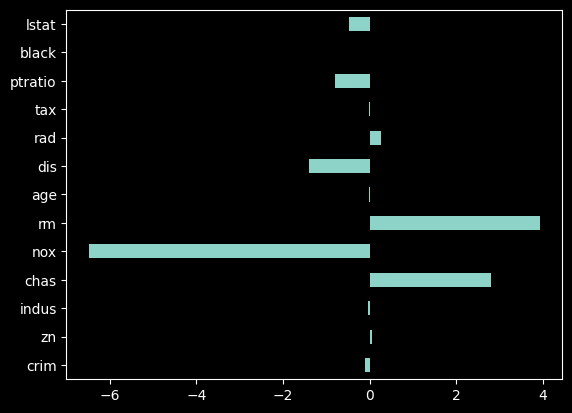

In [104]:
s1=pd.Series(Ridge_model.coef_,index=x.columns)
s1.plot(kind="barh")

Hyperparameter training

Lasso regression

In [107]:
lasso_reg_model=Lasso()

hyperparameters={"alpha":np.arange(0.01,5,0.01)}

gscv_lasso_model=GridSearchCV(lasso_reg_model,hyperparameters,cv=5) 

gscv_lasso_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       4.19, 4.2 , 4.21, 4.22, 4.23, 4.24, 4.25, 4.26, 4.27, 4.28, 4.29,
       4.3 , 4.31, 4.32, 4.33, 4.34, 4.35, 4.36, 4.37, 4.38, 4.39, 4.4 ,
       4.41, 4.42, 4.43, 4.44, 4.45, 4.46, 4.47, 4.48, 4.49, 4.5 , 4.51,
       4.52, 4.53, 4.54, 4.55, 4.56, 4.57, 4.58, 4.59, 4.6 , 4.61, 4.62,
       4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7 , 4.71, 4.72, 4.73,
       4.74, 4.75, 4.76, 4.77, 4.78, 4.79, 4.8 , 4.81, 4.82, 4.83, 4.84,
       4.85, 4.86, 4.87, 4.88, 4.89, 4.9 , 4.91, 4.92, 4.93, 4.94, 4.95,
       4.96, 4.97, 4.98, 4.99])})

In [108]:
gscv_lasso_model.best_estimator_

Lasso(alpha=0.01)

In [109]:
gscv_lasso_model.best_params_

{'alpha': 0.01}

Check Training data evaluation and testing data evaluation

In [111]:
lasso_model=Lasso(alpha=0.01)
lasso_model.fit(x_train, y_train)
y_predict_training=lasso_model.predict(x_train)
mse=mean_squared_error(y_train, y_predict_training)
print("Mean Squared error:",mse)
print()
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
print()
mae=mean_absolute_error(y_train, y_predict_training)
print("Mean absolute error:",mae)
print()
r_sqaured=r2_score(y_train, y_predict_training)
print("R squared value:",r_sqaured)

Mean Squared error: 21.232780492200057

Root mean squared error: 4.607904132270989

Mean absolute error: 3.222234149382559

R squared value: 0.7410898248072131


In [112]:
y_predict_test=lasso_model.predict(x_test)
mse=mean_squared_error(y_test,y_predict_test)
print("Mean Squared Error:",mse)
print()
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)
print()
mae=mean_absolute_error(y_test,y_predict_test)
print("Mean absolute Error:",mae)
print()
r_sqaured=r2_score(y_test,y_predict_test)
print("R squared value:",r_sqaured)

Mean Squared Error: 25.484481383563832

Root Mean Squared Error: 5.0482156633372774

Mean absolute Error: 3.3497486797959266

R squared value: 0.7256465261119702


Ridge regression

In [114]:
Ridge_reg_model=Ridge()

hyperparameters={"alpha":np.arange(0.01,5,0.01)}

gscv_ridge_model=GridSearchCV(Ridge_reg_model,hyperparameters,cv=5)

gscv_ridge_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       4.19, 4.2 , 4.21, 4.22, 4.23, 4.24, 4.25, 4.26, 4.27, 4.28, 4.29,
       4.3 , 4.31, 4.32, 4.33, 4.34, 4.35, 4.36, 4.37, 4.38, 4.39, 4.4 ,
       4.41, 4.42, 4.43, 4.44, 4.45, 4.46, 4.47, 4.48, 4.49, 4.5 , 4.51,
       4.52, 4.53, 4.54, 4.55, 4.56, 4.57, 4.58, 4.59, 4.6 , 4.61, 4.62,
       4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7 , 4.71, 4.72, 4.73,
       4.74, 4.75, 4.76, 4.77, 4.78, 4.79, 4.8 , 4.81, 4.82, 4.83, 4.84,
       4.85, 4.86, 4.87, 4.88, 4.89, 4.9 , 4.91, 4.92, 4.93, 4.94, 4.95,
       4.96, 4.97, 4.98, 4.99])})

In [115]:
gscv_ridge_model.best_estimator_

Ridge(alpha=0.37)

In [116]:
gscv_ridge_model.best_params_

{'alpha': 0.37}

Check Training Data evaluation and testing data evaluation

In [118]:
Ridge_model=Ridge(alpha=0.37)
Ridge_model.fit(x_train, y_train)
y_predict_training=Ridge_model.predict(x_train)
mse=mean_squared_error(y_train,y_predict_training)
print("Mean squared error: ",mse)
print()
rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)
print()
mae=mean_absolute_error(y_train,y_predict_training)
print("Mean absolute error: ",mae)
print()
r_sqaured=r2_score(y_train,y_predict_training)
print("r squared value: ",r_sqaured)


Mean squared error:  21.24200001769299

Root Mean Squared Error:  4.608904427051291

Mean absolute error:  3.2238708453028595

r squared value:  0.7409774029338062


In [120]:
y_predict_test=Ridge_model.predict(x_test)
mse=mean_squared_error(y_test,y_predict_test)
print("Mean squared error:",mse)
print()
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
print()
mae=mean_absolute_error(y_test,y_predict_test)
print("Mean absolute error:",mae)
print()
r_sqaured=r2_score(y_test,y_predict_test)
print("R squared value:",r_sqaured)

Mean squared error: 25.553488451945128

Root mean squared error: 5.055045840736277

Mean absolute error: 3.3531886878181028

R squared value: 0.7249036297332568


In [121]:
result=pd.DataFrame({"Linear Reg":[25.4195,5.0417,0.7263],
       "Lasso":[25.4844,5.0482,0.7256],
       "Ridge":[25.55,5.0550,0.7249]},index=["MSE","RMSE","R2 Score"])
result

,Linear Reg,Lasso,Ridge
MSE,25.4195,25.4844,25.5500
RMSE,5.0417,5.0482,5.0550
R2 Score,0.7263,0.7256,0.7249
